# 谁是顶级流量？爬取微博热搜两年数据的结果

### 一、爬取微博热搜神器网站

In [94]:
#根据网站特征，分析URL的规律，发现是按照日期变动的，因此迭代出此时间段内所有的日期
import datetime
def dateRange(start, end, step=1, format="%Y/%m/%d"):
    strptime, strftime = datetime.datetime.strptime, datetime.datetime.strftime
    days = (strptime(end, format) - strptime(start, format)).days
    return [strftime(strptime(start, format) + datetime.timedelta(i), format) for i in range(0, days, step)]

In [97]:
 if __name__ == '__main__':
    dates = dateRange("2017/05/09", "2019/04/05")

In [99]:
#将迭代的日期放入URL中，并逐个爬取网站，存入到dict中。
import requests
import pandas as pd
import json
headers = {"Accept-Language": "en-US, en;q=0.5"}
Keyword = {}
URL = {}
Count = {}
SearchCount = {}
Rank = {}
for i in dates:
    re = requests.get('http://www.enlightent.com/research/top/getWeiboHotSearchDayAggs.do?date='+i)
    re.encoding = 'utf-8'    
    text = re.text
    jsonobj = json.loads(text)

    for item in jsonobj:
        keyword = item['keyword']
        Keyword[keyword]={}

        url = item['url']
        URL[url]={}

        count = item['count']
        Count[count]={}

        searchCount = item['searchCount']
        SearchCount[searchCount]={}

        rank = item['rank']
        Rank[rank]={}

In [100]:
len(Keyword)

114481

In [102]:
#将所有内容存入到csv文件中
import csv
datapage1 = {
    'Keyword':Keyword.keys(),
    'URL':URL.keys(),
    'Count': Count.keys(),
    'SearchCount':SearchCount.keys(),
    'Rank': Rank.keys(),
}
weibo = pd.DataFrame.from_dict(datapage1, orient ='index').transpose()
print(weibo.info())
weibo.to_csv('weibo_rank_all.csv',index = False, encoding = 'utf_8_sig')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138184 entries, 0 to 138183
Data columns (total 5 columns):
Keyword        114481 non-null object
URL            115747 non-null object
Count          144 non-null object
SearchCount    138184 non-null object
Rank           50 non-null object
dtypes: object(5)
memory usage: 5.3+ MB
None


### 二、 对爬取内容进行分词处理

In [228]:
# n-gram，对爬取的文字进行分词。
import re
n=10
wdict = {}
with open('word_n2.txt','r',encoding="utf-8") as f:
    for line in f:
        line = line.strip("\n")
        clean = re.sub(r' ','',line)
        for i in range(len(clean)):
            word = clean[i:i+n]
            if word in wdict:
                count = wdict[word]
            else:
                count=0
            count = count + 1
            wdict[word]=count    
wdict = sorted(wdict.items(),key=lambda item:item[1],reverse=True)
wordcount = len(wdict) 

In [229]:
#将n=2,n=3,n=4,n=5,....直到n=10的词汇存入到同一个文件之中
with open('weibo_word_all.txt','a', encoding ='utf-8') as f:
    for i in wdict:
        f.write(i[0] + '\t' +str(i[1])+'\n')

In [211]:
f.close()

In [239]:
#找出词汇出现频率大于500的词汇，共有30个
import codecs
import re
from collections import Counter
f1 = codecs.open('weibo_word_all.txt','r', encoding='utf-8',errors = "ignore")
dict1={}
for line in f1.readlines('\n'):
    line = line.strip('\n')
    line = line.split('\t')
    if ".." not in line:
        if "..." not in line:
            if len(line[0])>1:
                if int(line[1])>500:
                    dict1[line[0]]=int(line[1])  

In [240]:
len(dict1)

30

In [241]:
# 微博热搜榜出现频次前30的词汇
print(dict1)

{'中国': 2329, '00': 2084, '回应': 1826, '20': 1705, '10': 1171, '学生': 1132, '世界': 965, '大学': 863, '朋友': 852, '01': 849, '什么': 745, '孩子': 729, '手机': 709, '日本': 674, '18': 674, '0万': 654, '女儿': 651, '男子': 648, '美国': 640, '北京': 637, '30': 634, '女孩': 620, '一个': 605, '妈妈': 603, '第一': 579, '50': 575, 'ne': 518, '女生': 514, '自己': 511, '201': 732}


In [242]:
#将结果存入到csv中
dict1 = sorted(dict1.items(),key=lambda item:item[1],reverse=True) 
wordcount = len(dict1)
print(wordcount)
with open('weiboword_large500.txt','w', encoding ='utf-8') as f:
    for i in dict1:
        f.write(i[0] + '\t' +str(i[1])+'\n')

30


### 三、将网站爬取的和自行输入的明星人民txt导入为词包，进行匹配

In [308]:
#爬取网站的明星人名存为txt词典
names = []
f2 = codecs.open('names.txt','r', encoding='utf-8',errors = "ignore").readlines()
for line in f2:
    line = line.strip('\ufeff')
    line = line.strip('\r\n')
    names.append(line)

In [309]:
#共有364个人名
len(names)

364

In [310]:
#将分词的词典导入，并索引人名及频次。
import codecs
import re
from collections import Counter
f1 = codecs.open('weibo_word_all.txt','r', encoding='utf-8',errors = "ignore")
dict2={}
for line in f1.readlines('\n'):
    line = line.strip('\n')
    line = line.split('\t')
    if line[0] in names:
        dict2[line[0]]=int(line[1]) 

In [311]:
#在分好的词汇中，共找到328个明星人名
len(dict2)

328

In [325]:
namedict = sorted(dict2.items(),key=lambda item:item[1],reverse=True)

In [327]:
#devide the tunple in list
starname = []
count = []
for i in Namelist:
    starname.append(i[0])
    count.append(i[1])

In [330]:
#上榜次数最多的为以下明星
top10 = starname[:10]
frequency = count[:10]
print(top10)

['周杰伦', '鹿晗', '杨幂', '易烊千玺', '蔡徐坤', '王俊凯', 'Angelababy', '赵丽颖', '薛之谦', '范冰冰']


### 四、可视化结果

<Figure size 9000x8000 with 0 Axes>

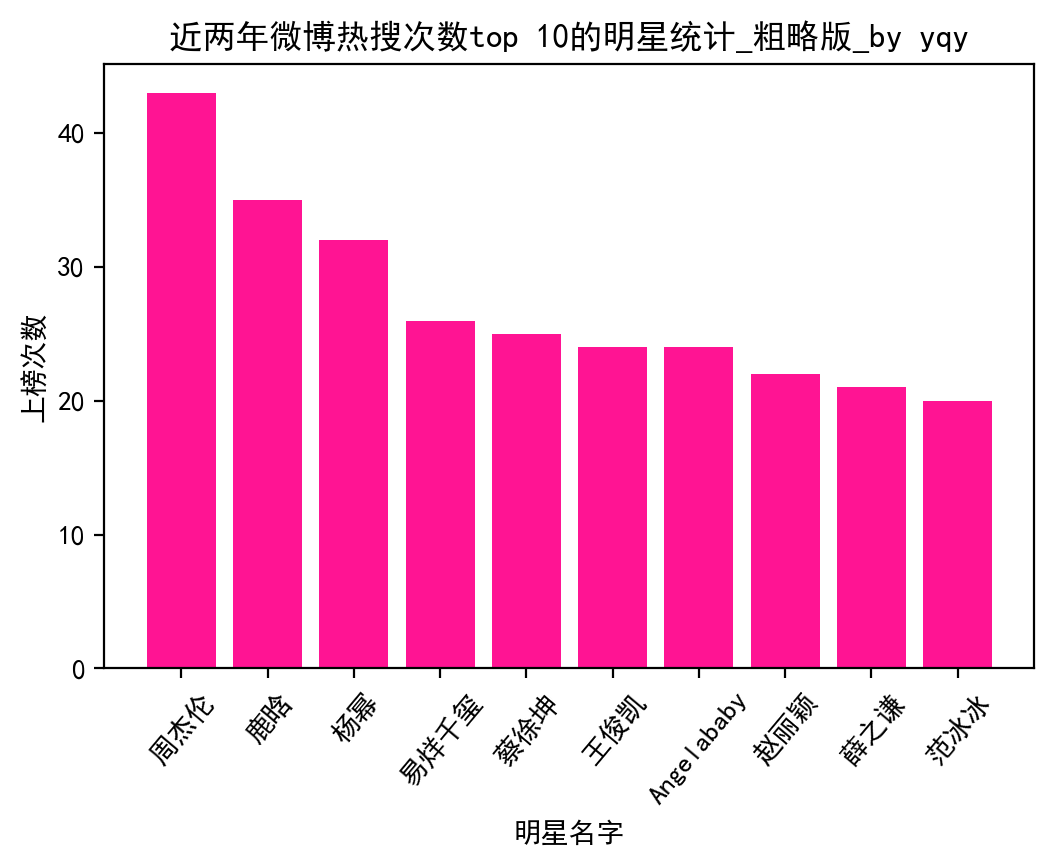

In [377]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
#创建绘图图表对象，可以不显式创建，跟cv2中的cv2.namedWindow()用法差不多
plt.figure(figsize=(45,40))
plt.figure('Draw')
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.title("近两年微博热搜次数top 10的明星统计_粗略版_by yqy")
plt.bar(top10,frequency,color = "deeppink")  # plot绘制折线图
plt.xticks(top10, rotation=50)# 第一个参数是值，第二个参数是对应的显示效果(若无传入则默认直接显示原始数据)，第三个参数是标签旋转角度
plt.xlabel(r'明星名字')
plt.ylabel(r'上榜次数')
plt.savefig("top10star.jpg")  #保存图象
plt.draw()  # 显示绘图
plt.pause(5)  #显示5秒
plt.close() 

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(namedict,rwidth=0.9,facecolor = 'c',alpha = 0.5)
plt.grid(True)
plt.xlabel('Name')
plt.ylabel('Frequency Percentage')

In [23]:
from selenium import webdriver  
import time 
import re
from lxml import etree
from bs4 import BeautifulSoup
import bs4 as bs
from selenium.common.exceptions import NoSuchElementException 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
import pandas as pd

#browser = webdriver.Firefox()#Chrome('./chromedriver.exe') 
   
# For every page in the interval
PATIENCE_TIME = 60 
driver = webdriver.Chrome() 
#driver.get('http://www.enlightent.com/research/rank/weiboSearchRank?dt_dapp=1#') 
driver.get("http://www.enlightent.com/research/top/getWeiboHotSearchDayAggs.do?date=2018/06/27")
driver.encoding = 'utf-8'
driver.maximize_window()
html = driver.page_source
soup = BeautifulSoup(html,'lxml')
driver.close()

In [24]:
Title = []
Search_number = []
Time_on_hotsearch = []
Highest_rank = []

hot_search_containers = soup.find_all('div', class_='card')
for container in hot_search_containers:
    #find all the date of the news
    try: 
        for title in container.find_all('h3',class_="card-keyword"):
            Title.append(title.text)
    except: 
        title = "no_title"
        Title.append(title)
        
for container in hot_search_containers:
    #find all the date of the news
    try: 
        for search_number in container.find_all('p',class_="search-count right"): #maybe search-count right
            Search_number.append(search_number.text)
    except: 
        search_number = "no_search_number"
        Search_number.append(search_number)
        
for container in hot_search_containers:
    #find all the date of the news
    try: 
        for time_on_hotsearch in container.find_all('p',class_="left"): 
            Time_on_hotsearch.append(time_on_hotsearch.text)
    except: 
        time_on_hotsearch = "no_time_on_hotsearch"
        Time_on_hotsearch.append(time_on_hotsearch)   
        
for container in hot_search_containers:
    #find all the date of the news
    try: 
        for highest_rank in container.find('div',class_="card-other clear").find_all('p',class_="right"): 
            Highest_rank.append(highest_rank.text)
    except: 
        highest_rank = "no_highest_rank"
        Highest_rank.append(highest_rank)       

In [25]:
print(Title)

[]


In [26]:
print(Search_number)

[]


In [21]:
print(Time_on_hotsearch)

['前72小时累计在榜：2小时50分', '前72小时累计在榜：2小时30分', '前72小时累计在榜：3小时40分', '前72小时累计在榜：0小时30分', '前72小时累计在榜：2小时10分', '前72小时累计在榜：1小时50分', '前72小时累计在榜：4小时10分', '前72小时累计在榜：5小时40分', '前72小时累计在榜：2小时30分', '前72小时累计在榜：2小时50分', '前72小时累计在榜：3小时40分', '前72小时累计在榜：0小时30分', '前72小时累计在榜：0小时20分', '前72小时累计在榜：1小时10分', '前72小时累计在榜：1小时0分', '前72小时累计在榜：6小时10分', '前72小时累计在榜：0小时20分', '前72小时累计在榜：2小时30分', '前72小时累计在榜：1小时10分', '前72小时累计在榜：3小时40分', '前72小时累计在榜：2小时10分', '前72小时累计在榜：3小时0分', '前72小时累计在榜：7小时0分', '前72小时累计在榜：4小时10分', '前72小时累计在榜：6小时50分', '前72小时累计在榜：4小时10分', '前72小时累计在榜：2小时20分', '前72小时累计在榜：2小时0分', '前72小时累计在榜：1小时40分', '前72小时累计在榜：8小时40分', '前72小时累计在榜：1小时50分', '前72小时累计在榜：10小时40分', '前72小时累计在榜：4小时0分', '前72小时累计在榜：5小时50分', '前72小时累计在榜：1小时50分', '前72小时累计在榜：5小时30分', '前72小时累计在榜：5小时40分', '前72小时累计在榜：8小时50分', '前72小时累计在榜：5小时20分', '前72小时累计在榜：0小时40分', '前72小时累计在榜：9小时50分', '前72小时累计在榜：0小时20分', '前72小时累计在榜：6小时20分', '前72小时累计在榜：4小时30分', '前72小时累计在榜：9小时50分', '前72小时累计在榜：0小时10分', '前72小时累计在榜：4小时0分', '前72小时累计在榜：0小时10分', '前72小时累计在榜：3小时40分', '前72小时累计在榜：9小时50分']


In [22]:
print(Highest_rank)

['微博热搜历史最高排名：1', '微博热搜历史最高排名：2', '微博热搜历史最高排名：2', '微博热搜历史最高排名：4', '微博热搜历史最高排名：5', '微博热搜历史最高排名：6', '微博热搜历史最高排名：1', '微博热搜历史最高排名：4', '微博热搜历史最高排名：7', '微博热搜历史最高排名：6', '微博热搜历史最高排名：5', '微博热搜历史最高排名：12', '微博热搜历史最高排名：13', '微博热搜历史最高排名：11', '微博热搜历史最高排名：12', '微博热搜历史最高排名：1', '微博热搜历史最高排名：17', '微博热搜历史最高排名：17', '微博热搜历史最高排名：18', '微博热搜历史最高排名：16', '微博热搜历史最高排名：11', '微博热搜历史最高排名：16', '微博热搜历史最高排名：2', '微博热搜历史最高排名：16', '微博热搜历史最高排名：21', '微博热搜历史最高排名：5', '微博热搜历史最高排名：26', '微博热搜历史最高排名：15', '微博热搜历史最高排名：20', '微博热搜历史最高排名：1', '微博热搜历史最高排名：28', '微博热搜历史最高排名：1', '微博热搜历史最高排名：17', '微博热搜历史最高排名：2', '微博热搜历史最高排名：32', '微博热搜历史最高排名：16', '微博热搜历史最高排名：10', '微博热搜历史最高排名：10', '微博热搜历史最高排名：25', '微博热搜历史最高排名：40', '微博热搜历史最高排名：16', '微博热搜历史最高排名：42', '微博热搜历史最高排名：10', '微博热搜历史最高排名：5', '微博热搜历史最高排名：8', '微博热搜历史最高排名：46', '微博热搜历史最高排名：31', '微博热搜历史最高排名：48', '微博热搜历史最高排名：23', '微博热搜历史最高排名：11']


In [ ]:
div class = "content show-footer"